In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cProfile

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [6]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=False)

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(executer, lincar, estimator='central_fd', max_it=10000, eps=0.000001,  
                       parameter_domain=np.array([0,1]), rate = 1)
optimizer.estimator.var = 0.5

In [7]:
par, conv = optimizer.optimize(policy)

Start Central Finite Differences optimization:
Initial Parameters: [ 0.45639  0.02938  0.82225]
Run: 0  	Parameter: 	[ 0.45639  0.02938  0.82225]	Reward: -58.0191622188
		Gradient: 	[ -1.45249  12.98194   0.31028]
Run: 100  	Parameter: 	[  6.4386   10.3026    2.84466]	Reward: -45.522951356
		Gradient: 	[ 0.02862 -0.03457  0.05037]
		Average Time: 	0.02s/step
Run: 200  	Parameter: 	[ 6.57686  8.20755  5.56117]	Reward: -38.0041042679
		Gradient: 	[ 0.01078 -0.00902  0.03043]
		Average Time: 	0.02s/step
Run: 300  	Parameter: 	[ 5.62581  5.4106   9.48737]	Reward: -25.0044586989
		Gradient: 	[-0.03801 -0.03079  0.04248]
		Average Time: 	0.02s/step
Run: 400  	Parameter: 	[  4.29725   3.70653  12.13254]	Reward: -19.3223209142
		Gradient: 	[-0.39873  0.38286  0.01769]
		Average Time: 	0.02s/step
Run: 500  	Parameter: 	[  4.02114   3.89037  13.52031]	Reward: -17.5422904636
		Gradient: 	[ 0.26043 -0.27214  0.01037]
		Average Time: 	0.02s/step
Run: 600  	Parameter: 	[  4.21569   3.96827  14.67519

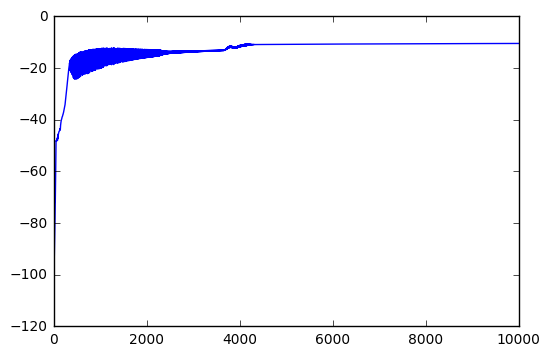

In [8]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[  8.72239   8.3446   42.5139 ]
Best Reward: 	-10.4552116712


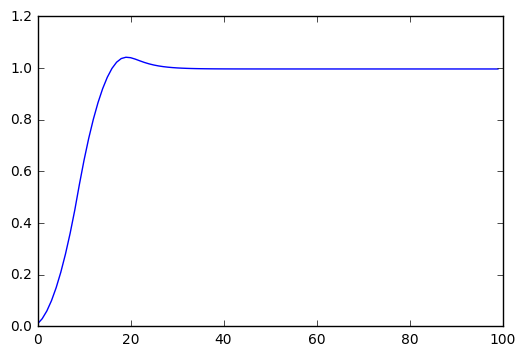

In [9]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [5]:
policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(executer, lincar, estimator='forward_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [6]:
par, conv = optimizer.optimize(policy)

KeyboardInterrupt: 

In [ ]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


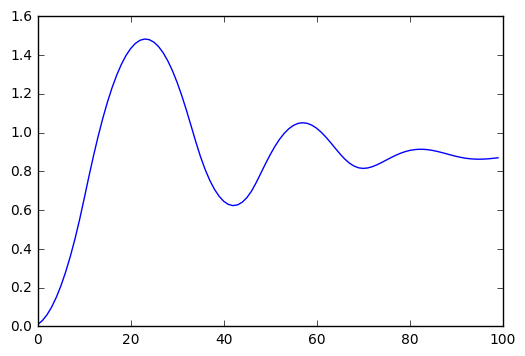

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()